In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [3]:
houses = pd.read_csv('1_4_houses.csv')
houses.head(7)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


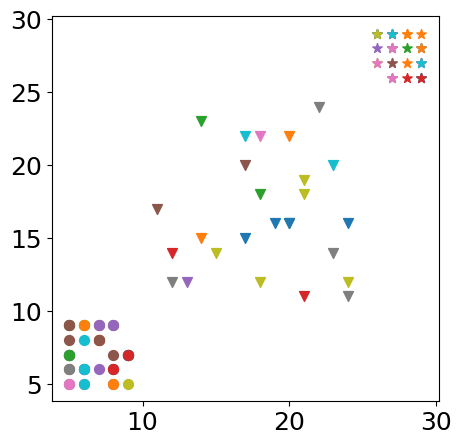

In [5]:
fig = plt.figure(figsize=(5, 5)) # создаем картинку

markers = {"basic": "o", "medium": "v", "luxury": "*"}
for d1, d2, l in zip(houses.dim_1, houses.dim_2, houses.level):
    plt.scatter(d1, d2, s=50, marker=markers[l])

# отображаем картинку
plt.show()

In [6]:
# импортируем модуль, отвечающий за кластеризацию
from sklearn.cluster import KMeans

In [7]:
# выгружаем признаки в отдельную переменную
X = houses[["dim_1", "dim_2"]]

# создаем модель для кластеризации
clust = KMeans(n_clusters=3).fit(X)

/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
# смотрим центры кластеров
[c1, c2, c3] = clust.cluster_centers_

In [9]:
clust.cluster_centers_

array([[ 6.76744186,  7.1627907 ],
       [27.42424242, 27.51515152],
       [18.5       , 16.45833333]])

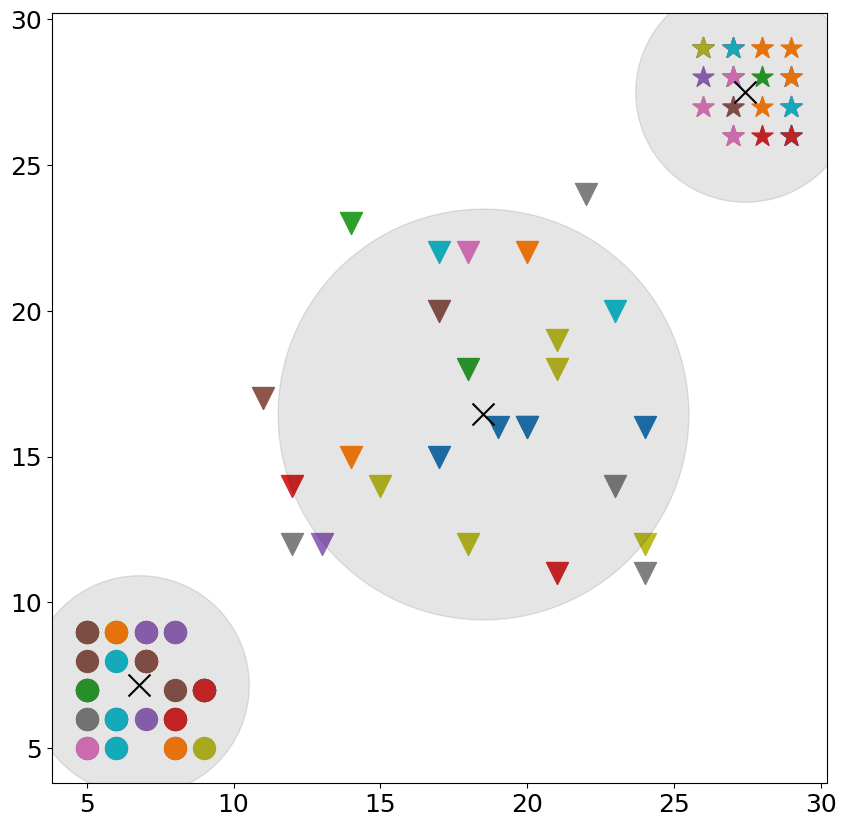

In [13]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"basic": "o", "medium": "v", "luxury": "*"}
for d1, d2, l in zip(houses.dim_1, houses.dim_2, houses.level):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()